<a href="https://colab.research.google.com/github/lerdeljan17/arim-sales-predicition/blob/main/Arima_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and exploring data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATAPATH = '/content/drive/MyDrive/EMAS/demo data.xlsx'
data = pd.read_excel(DATAPATH)
data.head(10)

,Unnamed: 0,product,week_no,year,month,salesQ,price,revenue,promo_price,display_1,...,catalog_3,catalog_4,time.Halloween,time.Thanksgiving,time.Christmas,time.NewYear,time.Easter,time.Memorial,time.X4thJuly,time.LabourDay
0,NaN,beer.beer_SS1,1,1,Jan,22,5.450909,119.919998,1,1,...,0,0,0,0,0,0,0,0,0,0
1,NaN,beer.beer_SS1,2,1,Jan,12,6.450000,77.400000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,beer.beer_SS1,3,1,Jan,11,6.490000,71.390000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,beer.beer_SS1,4,1,Jan,4,6.490000,25.960000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,beer.beer_SS1,5,1,Feb,3,6.490000,19.470000,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,beer.beer_SS1,6,1,Feb,11,6.090000,66.990000,1,1,...,0,0,0,0,0,0,0,0,0,0
6,NaN,beer.beer_SS1,7,1,Feb,22,5.430000,119.460000,1,1,...,0,0,0,0,0,0,0,0,0,0
7,NaN,beer.beer_SS1,8,1,Feb,25,6.230000,155.750000,0,1,...,0,0,0,0,0,0,0,0,0,0
8,NaN,beer.beer_SS1,9,1,Mar,4,5.990000,23.960000,0,1,...,0,0,0,0,0,0,0,0,0,0
9,NaN,beer.beer_SS1,10,1,Mar,7,6.560000,45.920000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from pandas import datetime
from matplotlib import pyplot
import calendar


# Define a function to parse the date-time values from the three columns
# def parse_date(row):
#     week_no = int(row['week_no'])
#     year = int(row['year'])
#     year += 1900
#     month = pd.to_datetime(row['month'], format='%b').month
#     num_days = calendar.monthrange(year, month)[1]
#     day = (week_no-1)*7+1
#     if day < 1:
#         day = 1
#     elif day > num_days:
#         day = num_days
#     return pd.Timestamp(year=year, month=month, day=day)

series = pd.read_excel(DATAPATH, squeeze=True, usecols=[1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])
# series['date'] = series.apply(parse_date, axis=1)

series['holiday'] = series[['time.Halloween', 'time.Thanksgiving', 'time.Christmas', 'time.NewYear','time.Easter', 'time.Memorial', 'time.X4thJuly', 'time.LabourDay' ]].max(axis=1)
series['promotion'] = series[['display_1', 'display_2', 'catalog_1', 'catalog_2','catalog_3', 'catalog_4']].max(axis=1)
series = series.drop(['time.Halloween', 'time.Thanksgiving', 'time.Christmas', 'time.NewYear','time.Easter', 'time.Memorial', 'time.X4thJuly', 'time.LabourDay' ], axis=1)
series = series.drop(['display_1', 'display_2', 'catalog_1', 'catalog_2','catalog_3', 'catalog_4'], axis=1)

series.drop(columns=['year', 'month'], inplace=True)
series.set_index('week_no', drop=True, append=False, inplace=True, verify_integrity=False)
print(series.head())
# df_plot = series['salesQ']
# df_plot.plot(figsize=(30, 10))
# pyplot.show()

               product  salesQ     price     revenue  promo_price  holiday  \
week_no                                                                      
1        beer.beer_SS1      22  5.450909  119.919998            1        0   
2        beer.beer_SS1      12  6.450000   77.400000            0        0   
3        beer.beer_SS1      11  6.490000   71.390000            0        0   
4        beer.beer_SS1       4  6.490000   25.960000            0        0   
5        beer.beer_SS1       3  6.490000   19.470000            0        0   

         promotion  
week_no             
1                1  
2                0  
3                0  
4                0  
5                0  


         salesQ     price     revenue  promo_price  holiday  promotion
week_no                                                               
1            22  5.450909  119.919998            1        0          1
2            12  6.450000   77.400000            0        0          0
3            11  6.490000   71.390000            0        0          0
4             4  6.490000   25.960000            0        0          0
5             3  6.490000   19.470000            0        0          0


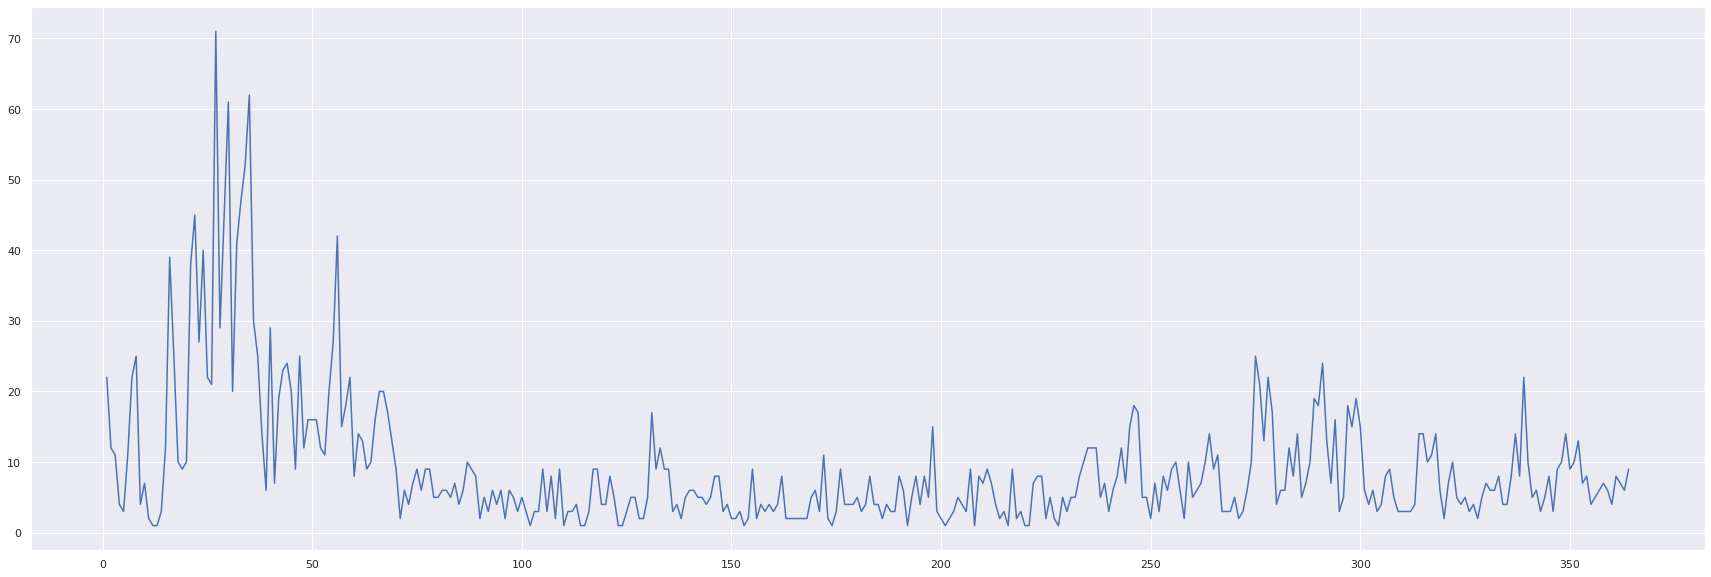

In [ ]:
df_x = series[series['product'] == 'beer.beer_SS1']
df_x.drop(columns=['product'], inplace=True)
print(df_x.head())
pyplot.figure(figsize=(30, 10))
pyplot.plot(df_x['salesQ'])
pyplot.show()

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(df_x)

         salesQ  price  revenue  promo_price  holiday  promotion
week_no                                                         
1            22  5.451   119.92            1        0          1
2            12  6.450    77.40            0        0          0
3            11  6.490    71.39            0        0          0
4             4  6.490    25.96            0        0          0
5             3  6.490    19.47            0        0          0
6            11  6.090    66.99            1        0          1
7            22  5.430   119.46            1        0          1
8            25  6.230   155.75            0        0          1
9             4  5.990    23.96            0        0          1
10            7  6.560    45.92            0        0          0
11            2  7.990    15.98            0        0          0
12            1  7.990     7.99            0        0          0
13            1  7.990     7.99            0        0          0
14            3  7.320   

## autocorrelation plot

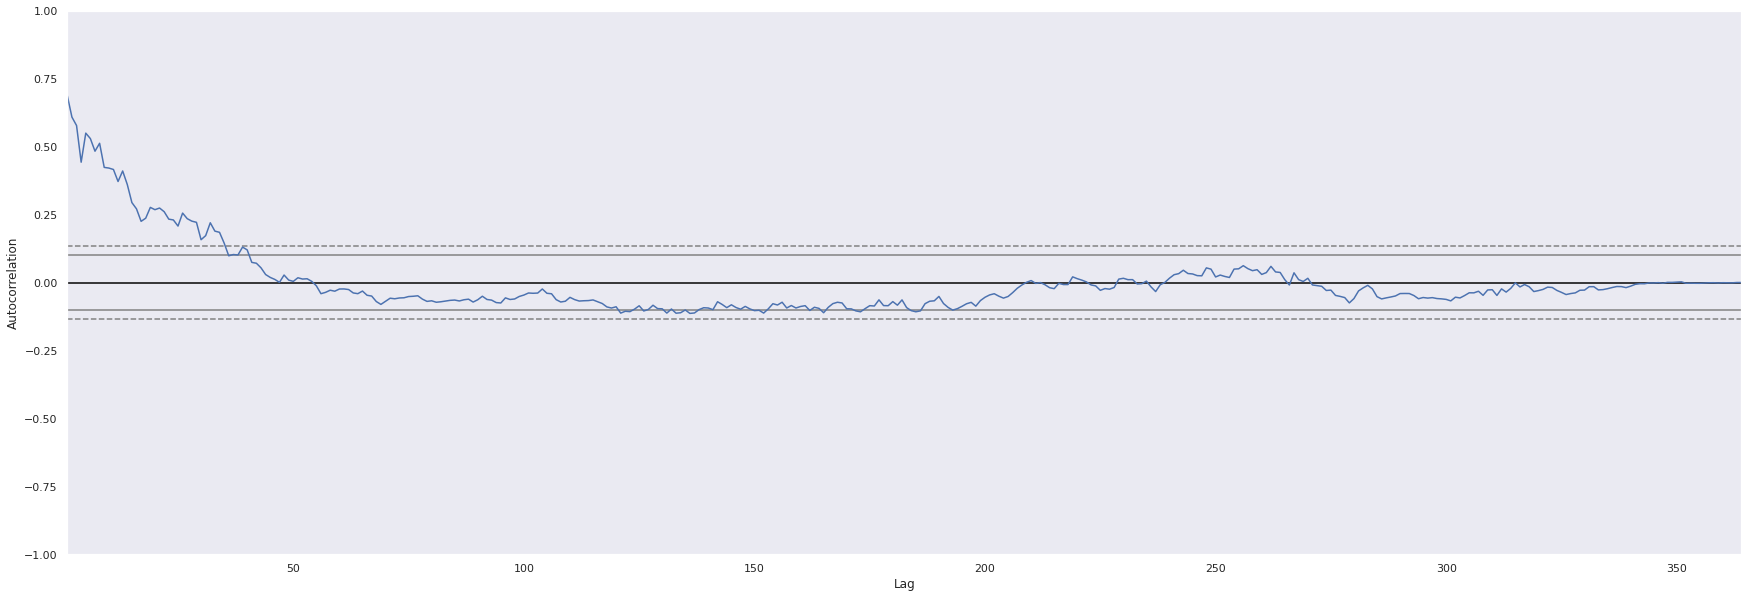

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

# df_x.drop(columns=['product'], inplace=True)
df = df_x[['salesQ']]
pyplot.figure(figsize=(30,10))
autocorrelation_plot(df)
pyplot.show()

## finding the best p,d,q values by minimizing AIC

In [ ]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.0 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima
import itertools

def AIC_PDQS(df, exog):
  # Define the p, d and q parameters to take any value between 0 and 2
  p = q = range(0, 5)
  d = range(0, 2)
  # Auto-Regressive (p) -> Number of autoregressive terms.
  # Integrated (d) -> Number of nonseasonal differences needed for stationarity.
  # Moving Average (q) -> Number of lagged forecast errors in the prediction equation.

  # Generate all different combinations of p, q and q triplets
  pdq = list(itertools.product(p, d, q))

  # Generate all different combinations of seasonal p, q and q triplets
  pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

  # Run a grid with pdq and seasonal pdq parameters calculated above and get #the best AIC value
  ans = []
  for comb in pdq:
    for combs in pdqs:
      try:
        mod = sm.tsa.statespace.SARIMAX(df,order=comb,seasonal_order=combs,
        enforce_stationarity=False,enforce_invertibility=False, exog=exog)

        output = mod.fit()
        ans.append([comb, combs, output.aic])
        print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
      except:
        continue

  # Find the parameters with minimal AIC value
  ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
  print(ans_df.loc[ans_df['aic'].idxmin()])
  return ans_df

In [ ]:
X = df_x['salesQ'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

holidays = df_x['holiday'].values
holiday_train, holiday_test = holidays[0:size], holidays[size:len(holidays)]

promotion = df_x['promotion'].values
promotion_train, promotion_test = promotion[0:size], promotion[size:len(holidays)]

prices = df_x['price'].values
price_train, price_test = prices[0:size], prices[size:len(prices)]
exog=np.column_stack((holiday_train[:len(train)], price_train[:len(train)], promotion_train[:len(train)]))
AIC_PDQS(train, exog)

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1700.2990057625943
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1618.4004947952888
ARIMA (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =1505.7743561960083
ARIMA (0, 0, 0) x (0, 0, 3, 12)12 : AIC Calculated =1190.9686384613187
ARIMA (0, 0, 0) x (0, 0, 4, 12)12 : AIC Calculated =1116.0633793776988
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1726.2465538721704
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1475.3644503603118
ARIMA (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =1327.1810412048249
ARIMA (0, 0, 0) x (0, 1, 3, 12)12 : AIC Calculated =1095.5020729834962
ARIMA (0, 0, 0) x (0, 1, 4, 12)12 : AIC Calculated =977.0090911549066
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1624.6562669348625
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1606.1645674052745
ARIMA (0, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =1450.4913708516563
ARIMA (0, 0, 0) x (1, 0, 3, 12)12 : AIC Calculated =1192.928089842089
ARIMA (0

,pdq,pdqs,aic
0,"(0, 0, 0)","(0, 0, 0, 12)",1700.299006
1,"(0, 0, 0)","(0, 0, 1, 12)",1618.400495
2,"(0, 0, 0)","(0, 0, 2, 12)",1505.774356
3,"(0, 0, 0)","(0, 0, 3, 12)",1190.968638
4,"(0, 0, 0)","(0, 0, 4, 12)",1116.063379
...,...,...,...
2495,"(4, 1, 4)","(4, 1, 0, 12)",928.824409
2496,"(4, 1, 4)","(4, 1, 1, 12)",936.048062
2497,"(4, 1, 4)","(4, 1, 2, 12)",930.449251
2498,"(4, 1, 4)","(4, 1, 3, 12)",932.798737


In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import itertools

# Define range of p, d, and q values
p_values = q_values = range(0, 11) 
d_values = range(0, 2)

# Generate all possible combinations of p, d, and q values
pdq_values = list(itertools.product(p_values, d_values, q_values))

X = df_x['salesQ'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

holidays = df_x['holiday'].values
holiday_train, holiday_test = holidays[0:size], holidays[size:len(holidays)]

promotion = df_x['promotion'].values
promotion_train, promotion_test = promotion[0:size], promotion[size:len(holidays)]

prices = df_x['price'].values
price_train, price_test = prices[0:size], prices[size:len(prices)]

min_aic = float('inf')
best_p, best_q, best_d = None, None, None
# df_x.index = df_x.index.to_period('W')
# fit model
for pdq in pdq_values:
  p, d, q = pdq
  model = ARIMA(train, order=(p,d,q), exog=np.column_stack((holiday_train[:len(train)], price_train[:len(train)], promotion_train[:len(train)])))
  model_fit = model.fit()
  # summary of fit model

  aic = model_fit.aic
  # print(f"p={p}, q={q}, AIC={aic}")
  if aic < min_aic:
    min_aic = aic
    best_p, best_d, best_q = p, d, q
  # line plot of residuals
  # residuals = DataFrame(model_fit.resid)
  # residuals.plot(figsize=(30,10))
  # pyplot.show()

print(f"Best model: p={best_p}, d={best_d}, q={best_q}, AIC={min_aic}")

Best model: p=6, d=1, q=9, AIC=1522.0997953691224


Best model: p=6, d=1, q=9, AIC=1522.0997953691224 with promo, holiday and prices

Best model: p=4, d=0, q=10, AIC=1529.4104042546098 with promo, holiday and prices

Best model: p=4, d=1, q=0, AIC=1537.6152565675789 with promo, holiday and prices

Best model: p=9, d=0, q=2, AIC=1581.5951985697816 with holiday and prices


Best model: p=9, d=1, q=3, AIC=1567.396785758193 with holiday and prices

# Prediction

## finding the best model by rmse

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools


# Define range of p, d, and q values
p_values = q_values = range(0, 11) 
d_values = range(0, 2)

# Generate all possible combinations of p, d, and q values
pdq_values = list(itertools.product(p_values, d_values, q_values))

# df_x.index = df_x.index.to_period('W')
# split into train and test sets


min_aic = float('inf')
best_p, best_q, best_d = None, None, None
# walk-forward validation
for pdq in pdq_values:

	X = df_x['salesQ'].values
	size = int(len(X) * 0.66)
	train, test = X[0:size], X[size:len(X)]

	holidays = df_x['holiday'].values
	holiday_train, holiday_test = holidays[0:size], holidays[size:len(holidays)]

	promotion = df_x['promotion'].values
	promotion_train, promotion_test = promotion[0:size], promotion[size:len(holidays)]

	prices = df_x['price'].values
	price_train, price_test = prices[0:size], prices[size:len(prices)]

	history = [x for x in train]
	predictions = list()
 
	min_aic = float('inf')
	best_p, best_q, best_d = None, None, None
	
	p,d,q = pdq
	for t in range(len(test)):
		model = ARIMA(history, order=(p,d,q), exog=np.column_stack((holiday_train[:len(history)], price_train[:len(history)], promotion_train[:len(history)])))
		model_fit = model.fit()
		output = model_fit.forecast(exog=np.array([holiday_test[t], price_test[t], promotion_test[t]]).reshape(1, -1))
		yhat = output[0]
		predictions.append(yhat)
		obs = test[t]
		history.append(obs)
		holiday_train = np.append(holiday_train, holiday_test[t])
		price_train = np.append(price_train, price_test[t])
		promotion_train = np.append(promotion_train, promotion_test[t])
		# print('predicted=%f, expected=%f' % (yhat, obs))
	
		# calculate price elasticity using coefficients from the ARIMA model
		price_elasticity = model_fit.params[-1] * price_test[t] * (1 - model_fit.params[-2])
		# print('price elasticity=%f, params[-1]=%f, price_test[t]=%f, params[-2]=%f' % (price_elasticity, model_fit.params[-1], price_test[t], model_fit.params[-2]))
 
	# evaluate forecasts
	rmse = sqrt(mean_squared_error(test, predictions))
	if rmse < min_aic:
		min_aic = rmse
		best_p, best_d, best_q = p, d, q
	print(f'model: p={p}, d={d}, q={q}, RMSE={rmse}')
	# plot forecasts against actual outcomes
	# pyplot.plot(test)
	# pyplot.plot(predictions, color='red')
	# pyplot.show()

print(f"Best model: p={best_p}, d={best_d}, q={best_q}, RMSE={min_aic}")


model: p=0, d=0, q=0, RMSE=5.7529645231290125
model: p=0, d=0, q=1, RMSE=5.010523876481484
model: p=0, d=0, q=2, RMSE=4.993462023045807
model: p=0, d=0, q=3, RMSE=4.5126013568701415
model: p=0, d=0, q=4, RMSE=4.541890793561967
model: p=0, d=0, q=5, RMSE=4.598162078067547
model: p=0, d=0, q=6, RMSE=4.615163853047905
model: p=0, d=0, q=7, RMSE=4.622098225115667
model: p=0, d=0, q=8, RMSE=4.495025864355429
model: p=0, d=0, q=9, RMSE=4.4290771290195305
model: p=0, d=0, q=10, RMSE=4.55358248561559
model: p=0, d=1, q=0, RMSE=4.957048378205783
model: p=0, d=1, q=1, RMSE=4.324557816887732
model: p=0, d=1, q=2, RMSE=4.420799632184772
model: p=0, d=1, q=3, RMSE=4.440467429272755
model: p=0, d=1, q=4, RMSE=4.295291891780058
model: p=0, d=1, q=5, RMSE=4.60656782902949
model: p=0, d=1, q=6, RMSE=4.594320017865681
model: p=0, d=1, q=7, RMSE=4.579537073744299
model: p=0, d=1, q=8, RMSE=4.775597418535405
model: p=0, d=1, q=9, RMSE=4.697123411707486
model: p=0, d=1, q=10, RMSE=4.713160153996896
model: 

## using arima to predict values

predicted=1.800794, expected=6.000000
price elasticity=223.880961, params[-1]=34.152932, price_test[t]=7.990000, params[-2]=0.179568
predicted=4.217446, expected=8.000000
price elasticity=222.395438, params[-1]=33.945283, price_test[t]=7.990000, params[-2]=0.180027
predicted=7.238305, expected=12.000000
price elasticity=199.681755, params[-1]=33.895852, price_test[t]=7.240000, params[-2]=0.186321
predicted=13.642353, expected=7.000000
price elasticity=168.866080, params[-1]=33.830633, price_test[t]=5.990000, params[-2]=0.166692
predicted=13.251509, expected=15.000000
price elasticity=170.902004, params[-1]=34.021016, price_test[t]=6.056667, params[-2]=0.170596
predicted=13.554691, expected=18.000000
price elasticity=169.093403, params[-1]=34.007762, price_test[t]=5.990000, params[-2]=0.169916
predicted=10.617841, expected=17.000000
price elasticity=179.840388, params[-1]=34.360143, price_test[t]=6.342941, params[-2]=0.174833
predicted=10.681443, expected=5.000000
price elasticity=226.8

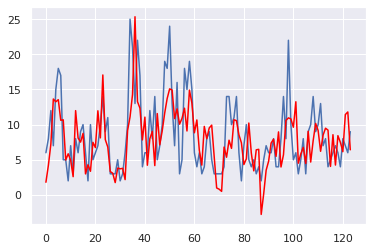

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = df_x['salesQ'].values
holidays = df_x['holiday'].values
prices = df_x['price'].values
promotion = df_x['promotion'].values

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
holiday_train, holiday_test = holidays[0:size], holidays[size:len(holidays)]
promotion_train, promotion_test = promotion[0:size], promotion[size:len(holidays)]

prices = df_x['price'].values
price_train, price_test = prices[0:size], prices[size:len(prices)]

history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(3,0,4), seasonal_order=(1,1,4,12), exog=np.column_stack((holiday_train[:len(history)], price_train[:len(history)], promotion_train[:len(history)])))
	model_fit = model.fit()
	output = model_fit.forecast(exog=np.array([holiday_test[t], price_test[t], promotion_test[t]]).reshape(1, -1))
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	holiday_train = np.append(holiday_train, holiday_test[t])
	price_train = np.append(price_train, price_test[t])
	promotion_train = np.append(promotion_train, promotion_test[t])
	print('predicted=%f, expected=%f' % (yhat, obs))
 
	# calculate price elasticity using coefficients from the ARIMA model
	price_elasticity = model_fit.params[-1] * price_test[t] * (1 - model_fit.params[-2])
	print('price elasticity=%f, params[-1]=%f, price_test[t]=%f, params[-2]=%f' % (price_elasticity, model_fit.params[-1], price_test[t], model_fit.params[-2]))
 
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


1.   Test RMSE: 4.716 with 6,1,9
2.   Test RMSE: 4.378 with 3,0,0
3.   Test RMSE: 4.055 with 3,0,0 without promotion
4. Test RMSE: 4.509 with 1,1,1 x 0,1,1,12
5.Test RMSE: 4.446 with order=(3,0,4), seasonal_order=(1,1,4,12)

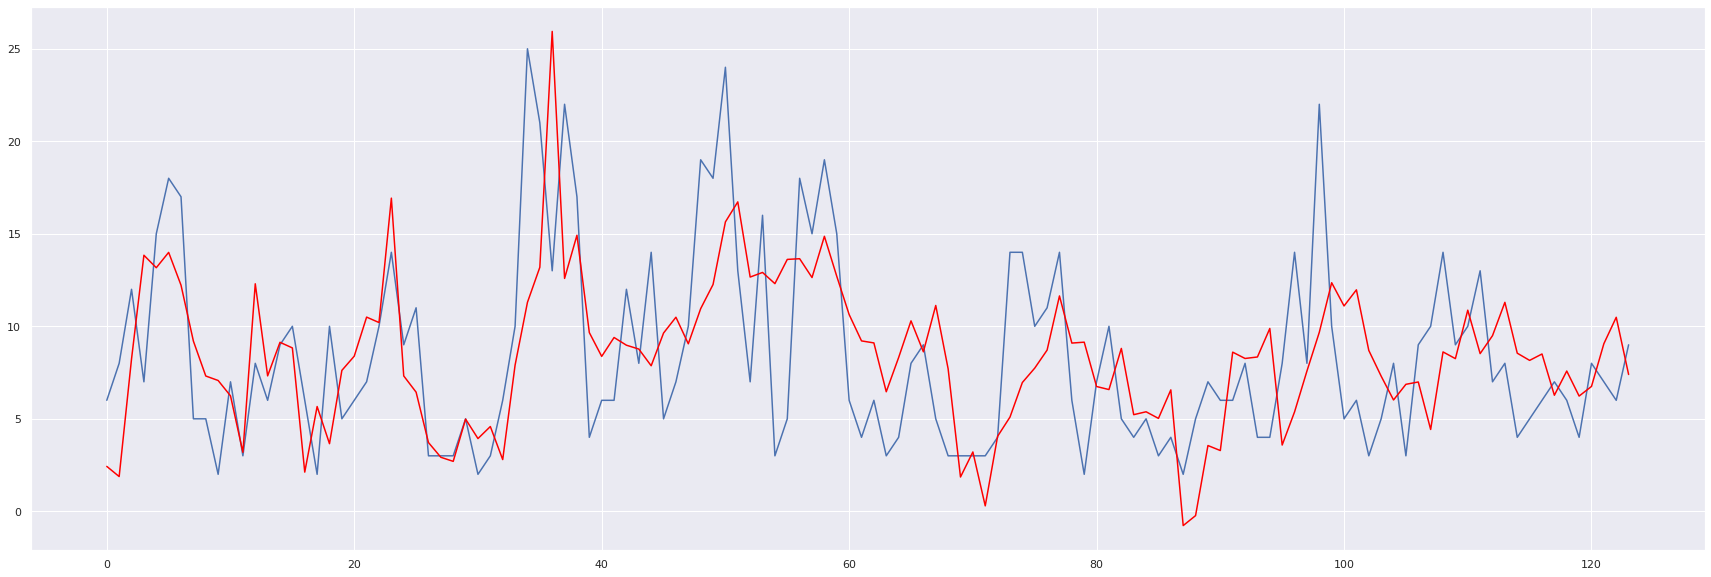

In [ ]:
# plot forecasts against actual outcomes
pyplot.figure(figsize=(30,10))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()